In [1]:
import copy
import math
import os
from collections import namedtuple

import gym
import ipywidgets as widgets
import matplotlib.pyplot as plt
import more_itertools as mitt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 4]

In [7]:
import matplotlib.pyplot as plt
import cv2


In [2]:
env = gym.make("CartPole-v1")

In [396]:
env.reset()

array([-0.02604472, -0.02930951,  0.02581255,  0.01887188], dtype=float32)

In [399]:
img = env.render(mode='rgb_array')
def preprocess_frame(img, size=(400, 100)):
    # cut off parts of image that nothing is happening in
    img = img[300:600]

    # take just the G values
    img = img[:, :, 1]

    # make black and white
    img = np.where(img == 255, 1.0, 0.0)

    # resize
    img = cv2.resize(img, size, interpolation=cv2.INTER_CUBIC)

    return img



In [401]:
preprocess_frame(img).shape


(100, 400)

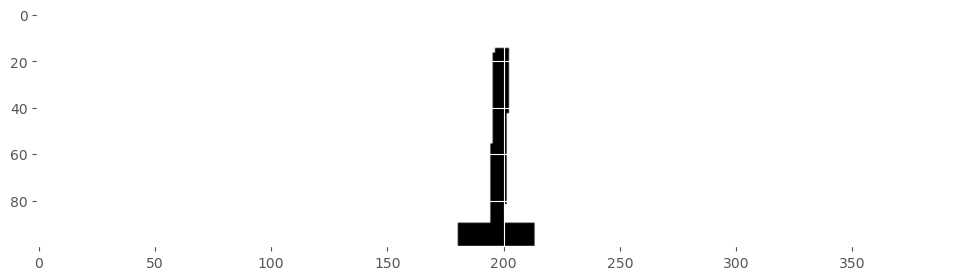

In [400]:
plt.imshow(preprocess_frame(img), cmap='gray')

In [395]:

img = env.render(mode='rgb_array')
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_rgb_resized = cv2.resize(img_rgb, (100,400), interpolation=cv2.INTER_CUBIC)
img_rgb_resized[img_rgb_resized < 255] = 0
img_rgb_resized = img_rgb_resized / 255

# image_memory = np.roll(self.image_memory, 1, axis = 0)
# image_memory[0,:,:] = img_rgb_resized

#self.imshow(self.image_memory,0)        
# np.expand_dims(self.image_memory, axis=0)